In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

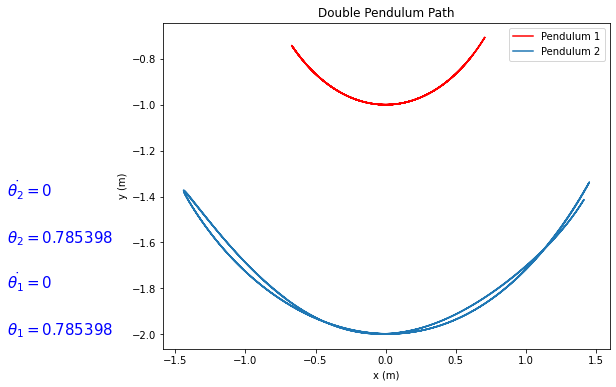

In [10]:


# Defining the double pendulum equations of motion
def double_pendulum_equations(y, t, L1, L2, m1, m2, g):
    theta1, theta1_dot, theta2, theta2_dot = y
#equations after using Euler Lagrange method in Lagranian Mechanics.
    theta1_double_dot = (
        -g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2)
        - 2 * np.sin(theta1 - theta2) * m2 * (theta2_dot ** 2 * L2 + theta1_dot ** 2 * L1 * np.cos(theta1 - theta2))
    ) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))

    theta2_double_dot = (
        2 * np.sin(theta1 - theta2) * (theta1_dot ** 2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1)
                                      + theta2_dot ** 2 * L2 * m2 * np.cos(theta1 - theta2))
    ) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))

    return [theta1_dot, theta1_double_dot, theta2_dot, theta2_double_dot]

### Simulation parameters
L1 = 1.0  # Length of the first pendulum
L2 = 1.0  # Length of the second pendulum
m1 = 1.0  # Mass of the first pendulum
m2 = 1.0  # Mass of the second pendulum
g = 9.81  # Acceleration due to gravity

### Initial conditions (theta1, theta1_dot, theta2, theta2_dot)
y0 = [(np.pi / 4), 0, np.pi /4, 0]

t = np.linspace(0, 10, 1000) # time period

# Solving the differential equations using odeint
sol = odeint(double_pendulum_equations, y0, t, args=(L1, L2, m1, m2, g))

# using arrays for solutions
theta1_sol, theta1_dot_sol, theta2_sol, theta2_dot_sol = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

# Converting angles to Cartesian coordinates for plotting
x1 = L1 * np.sin(theta1_sol)
y1 = -L1 * np.cos(theta1_sol)
x2 = x1 + L2 * np.sin(theta2_sol)
y2 = y1 - L2 * np.cos(theta2_sol)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x1, y1,label='Pendulum 1',color='Red')
plt.plot(x2, y2,label='Pendulum 2')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Double Pendulum Path')
plt.text(-2.7, -2, r'$\theta_1 = %g$' %(y0[0]), fontsize=15, color='blue')
plt.text(-2.7, -1.8, r'$\dot{\theta_1} = %g$' %(y0[1]), fontsize=15, color='blue')
plt.text(-2.7, -1.6, r'$\theta_2 = %g$' %(y0[2]), fontsize=15, color='blue')
plt.text(-2.7, -1.4, r'$\dot{\theta_2} = %g$' %(y0[3]), fontsize=15, color='blue')
plt.legend()
plt.grid(False)
plt.show()
